# Midterm Project
Linden Beemer - CPSC 436 - Fall 2022

## 1 - Import Statements
This project uses numpy and matplotlib in order to streamline scientific computing and plotting graphs of data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

## 2 - Dataset
This project uses data from the University of Wisconsin on breast cancer cells. There are 569 instances in the set, each having 32 features (ID, diagnosis, and 30 real-valued input features). The goal with this data is to create a model that is 95% accurate to the actual result given.

### 2.1 Loading the data
The variables used for storing the data are as follows:
- ``X_train`` contains 30 features detailing the mean, standard error, and the "worst" (largest) mean of the radius, texture, perimter, area, smoothness, compactness, concavity, concave points, symmetry, and cractal dimension of potential breast cancer cells
- ``y_train`` is the diagnosis decision
    - ``y_train = 1`` when a 'M' indicating malignant is seen 
    - ``y_train = 0`` when a 'B' indicating benign is seen
- Both ``X_train`` and ``y_train`` are numpy arrays.

In [4]:
def load_data(filename):
    data = np.genfromtxt(filename, delimiter=",")
    X = data[:, 2:]
    y_data = np.genfromtxt(filename, delimiter=",", usecols=(1), dtype=None, encoding=None)
    y = np.zeros(569)
    y[y_data == 'M'] = 1.
    
    return X, y

*As a side note, I struggled to get numpy arrays to work with the mis-matched types in this data, which is why this data import looks a little odd. I'm sure I could do this in a more efficient way but this was what gave me the fewest errors importing both characters and floats.

In [29]:
# load and view some of the dataset

X_train, y_train = load_data("./data/wdbc.data")

print("First two elements in X_train are:\n", X_train[:2])
print("Type of X_train:",type(X_train))

print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First two elements in X_train are:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
Type of X_train: <class 'numpy.ndarray'>
First five elements in y_train are:
 [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [30]:
print("The shape of X_train is: " + str(X_train.shape))
print("The shape of y_train is: " + str(y_train.shape))
print("We have m = %d training examples" % (len(y_train)))

The shape of X_train is: (569, 30)
The shape of y_train is: (569,)
We have m = 569 training examples


## 3 - Z-Score normalization
Z-score normalization gives all features in the table a mean of 0 and a standard deviation of 1. This makes it less likely that certain features are given more weight than others when modeled. This code is adapted from homework 4.

In [31]:
def zscore_normalize_features(X):
    """
    Args:
        X (ndarray (m, n))      : input data, m examples, n features
        
    Returns:
        X_norm (ndarray (m, n)) : input normalized by column
        mu (ndarray (n,))       : mean of each feature
        sigma (ndarray (n,))    : standard deviation of each feature
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return(X_norm, mu, sigma)

In [32]:
X_train, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu[:5]}, \nX_sigma = {X_sigma[:5]}\n")
print("first two normalized datapoints:\n", X_train[:2])

X_mu = [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02], 
X_sigma = [3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02]

first two normalized datapoints:
 [[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067

## 4 - Normalization in computing cost and gradient descent
Because there are so many features present in this dataset, it is important we minimize the weight of certain ones in order to prevent overfitting. We do this by using a specialized cost and gradient descent equation. I will be using a logistic regression model, with an added regularization parameter in the computing cost and gradient descent functions.

### 4.1 - Sigmoid function implementation
I will be implementing the sigmoid function I wrote in homework 5 to shorten my code and make it more readable. Evaluating this ```sigmoid(0)``` should give me exactly 0.5, as shown below.

In [35]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    if(isinstance(z, int) or isinstance(z, float)):
        g = 1 / (1 + np.exp(-1 * z))
    else:
        n = z.shape[0]
        g = np.zeros(n)
        for i in range(n):
            g[i] = 1 / (1 + np.exp(-1 * z[i])) 
    
    return g

In [36]:
print ("sigmoid(0) = " + str(sigmoid(0)))

sigmoid(0) = 0.5


### 4.2 - Logisitic Cost Function with Regularization
Here, I implement the compute_cost function from homework 5, this time making use of the lambda placeholder that was present but unused in the last homework.

In [37]:
def compute_cost(X, y, w, b, lambda_):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: (scalar) normalization parameter
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    total_cost = 0
    curr_cost = 0
    regularized_constant = 0
    
    # compute initial logistic regression cost
    for i in range(m):
        f_wb = sigmoid(np.dot(X[i], w) + b)
        curr_cost = ((-1 * y[i] * np.log(f_wb)) - 
                       (1 - y[i]) * np.log((1 - f_wb)))
        
        # calculate the lambda constant
        regularized_constant = 0
        for j in range(n):
            regularized_constant += w[j] ** 2
        regularized_constant = (lambda_ * regularized_constant) / (2 * m)
        
        total_cost += (curr_cost + regularized_constant)
    
    total_cost = -1 * total_cost / m
    

    return total_cost

Here, I will run my compute_cost with an initial w and b equal to 0. This is more to help me with troubleshooting any errors that might arise as zeroes will not change the regularized constant section.

In [38]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
initial_lambda = 1.
cost = compute_cost(X_train, y_train, initial_w, initial_b, initial_lambda)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): -0.693


### 4.3 - Regularized gradient for logistic regression
Here, I implement the compute_gradient function from homework 5, this time making use of the lambda placeholder that was present but unused in the last homework.

In [39]:
def compute_gradient(X, y, w, b, lambda_): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: (scalar) normalization parameter
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb = sigmoid(np.dot(X[i], w) + b)
        dj_db += (f_wb - y[i])
        for j in range(n):
            dj_dw[j] += ((f_wb - y[i]) * X[i][j]) + ((lambda_ / m) * w[j])
            
    dj_dw = dj_dw / m
    dj_db = dj_db / m

        
    return dj_db, dj_dw

Here, I will run my compute_gradient with an initial w and b equal to 0. This is more to help me with troubleshooting any errors that might arise as zeroes will not change the regularized constant section.

In [40]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
initial_lambda = 1.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b, initial_lambda)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):0.1274165202108963
dj_dw at initial w (zeros):[-0.3529633348145923, -0.20073899267749487, -0.35905873406226524, -0.3427883916743645, -0.17336106608943685, -0.2884195793200141, -0.33668471935543093, -0.3754869934056591, -0.15979358346446093, 0.006206885058401443, -0.2742049681145695, 0.004014599499701369, -0.2688898779301959, -0.26506798396292136, 0.03240174076973867, -0.14166294704487786, -0.12267644749050105, -0.1972854214005769, 0.003153220271648589, -0.03769908166157324, -0.3754096049015078, -0.22090910288224022, -0.3785331400409052, -0.3547989256038203, -0.20377511364437365, -0.2857432355691958, -0.31891661202522464, -0.38368324447763913, -0.20127519131440294, -0.1565897851978686]


### 4.3 - Learning parameters using gradient descent
Here, I implement the gradient_descent function present in homework 5. No edits are needed to this function as the regularization is implemented in previous steps.

In [41]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - (alpha * dj_dw)               
        b_in = b_in - (alpha * dj_db)              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [42]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -0.5


# Some gradient descent settings
iterations = 10000
alpha = 0.001
lambda_ = 0.01

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, lambda_)

Iteration    0: Cost    -0.66   
Iteration 1000: Cost    -0.24   
Iteration 2000: Cost    -0.18   
Iteration 3000: Cost    -0.15   
Iteration 4000: Cost    -0.14   
Iteration 5000: Cost    -0.13   
Iteration 6000: Cost    -0.12   
Iteration 7000: Cost    -0.12   
Iteration 8000: Cost    -0.11   
Iteration 9000: Cost    -0.11   
Iteration 9999: Cost    -0.10   


## 5 - Visualizing the learning curve
Below is the learning curve of iterations via cost as the compute_gradient function runs. This uses the code defined in homework 4 to visualize the learning curve.

In [43]:
def plot_cost_versus_iteration(hist):
    plt.plot(hist, c='b',label='Cost')
    plt.title("Cost vs. iteration"); 
    plt.ylabel('Cost')             ;  
    plt.xlabel('iteration step')   ;  
    plt.show()

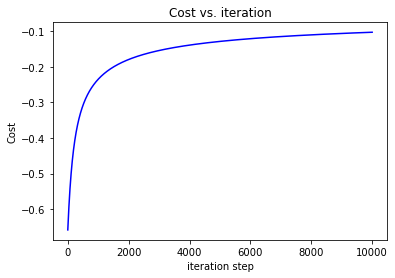

In [44]:
plot_cost_versus_iteration(J_history)

## 6 - Prediction
Here, I take previous work from homework 5 to predict whether a given instance is malignant (1) or benign (0). This uses the w and b computed during gradient descent to make a prediction and predicts 0 if the result is less than 0.5, 1 if greater.

In [45]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    for i in range(m):
        f_wb = sigmoid(np.dot(X[i], w) + b)
        p[i] = 0 if (f_wb < 0.5) else 1
    
    return p

In [46]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 97.539543


As you can see, after gradient descent my model has a 97.5% accuracy rate. This is also what the authors of the dataset estimate as their model's accuracy, so I am confident in it.